<h1>Modelo AR(1)</h1>

Obs,Y,MY,MS,ToP,AP,TP
1,1965,1,1,11.660,9.922,1.738
2,1965,2,2,10.832,9.254,1.578
3,1965,3,3,13.623,11.551,2.073
4,1965,4,4,12.254,10.343,1.911
5,1965,5,5,11.889,10.046,1.843
6,1965,6,6,12.834,10.789,2.045
7,1965,7,7,10.376,8.881,1.495
8,1965,8,8,5.136,3.772,1.364
9,1965,9,9,7.640,5.898,1.742
10,1965,10,10,12.037,10.186,1.851

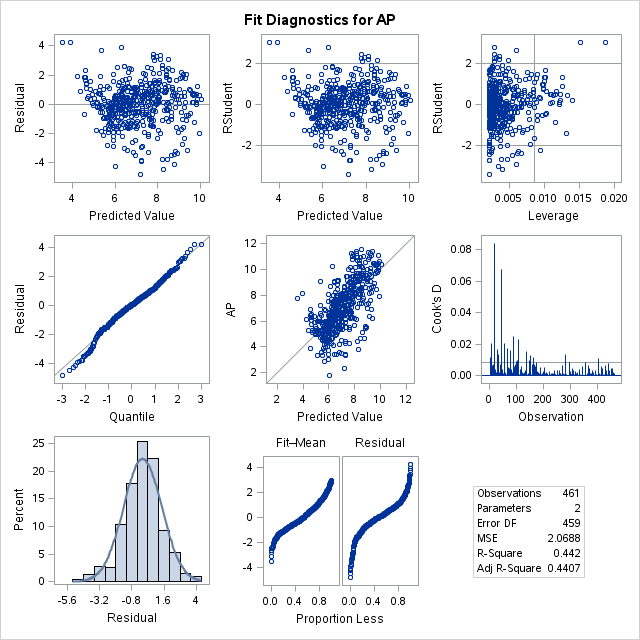
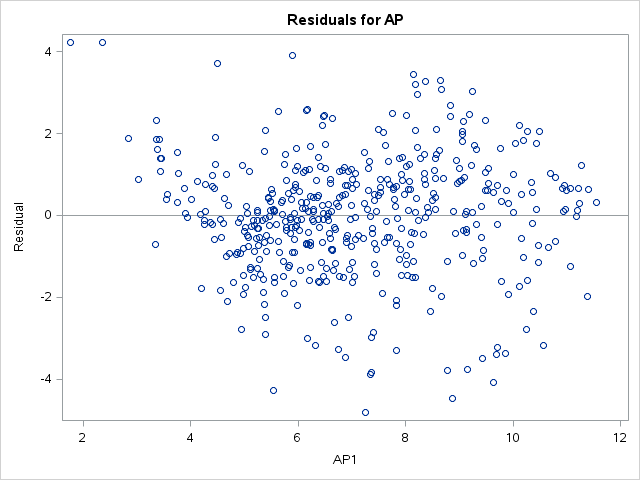
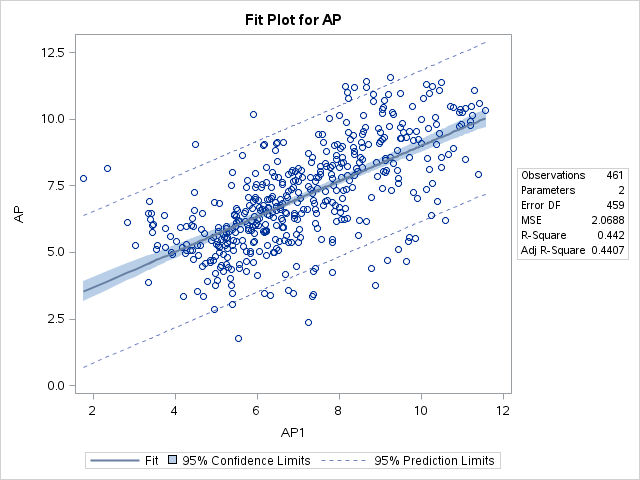

In [1]:

DATA ProdAutos;
   INFILE '/folders/myfolders/Econometria/auto_prod.dat';
   INPUT Y MY MS ToP AP TP;
RUN;
QUIT;

PROC PRINT DATA = ProdAutos;
   TITLE 'Producción de autos y camionetas en 462 meses del 1/1965 a 6/2003';
RUN;
QUIT;


data b;
   set ProdAutos;

	AP1 = lag(AP);
	
	run;
quit;

PROC REG DATA =WORK.b; 
	model AP =  AP1 / VIF SPEC DW;

title 'Validación del modelo, colinealidad de regresores, significancia de los parámetros';
   output out=out residual=r;	
run;
quit;

proc univariate data=out normal; /* Anderson-Darling */
	var r;
	title 'Normalidad: Anderson-Darling ';
run;
quit;
